
# Project: Investigate select indicators in GapMinder dataset for countries of the Americas 

## Table of Contents
<ul>
<li><a href="#intro">Section 1: Introduction</a></li>
<li><a href="#wrangling">Section 2: Data Wrangling</a></li>
<li><a href="#eda">Section 3: Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Section 4: Conclusions</a></li>
</ul>

<a id='intro'></a>
## Section 1: Introduction

> [GAPMINDER](https://www.gapminder.org/data/ "GAPMINDER data page") is a website where data about the countries of the world have been aggregated from various sources and where web interfaces have been provided for searching and visualizing. The data can also be downloaded in the form of .csv or .xlsx files (which was done for this project). This website provides access to literally hundreds of annualized indicators for upto 195 countries for a range of years from 1800 to 2100 (**not all indicators are available for all countries for all years**). 
>
> In this project we will examine a small set of indicators for the countries of the Americas, that is, the countries of the Western Hemisphere which includes the countries of North, South and Central America, the Carribean, Greenland and half of Antarctica. (Note that the latter two land masses contain no independent countries so they don't appear in the analysis.) This subset of the worlds countries was selected because of there historical similarities such as colonialism, ethnic and racial diversity and length of history as independent countries. The indicators that are included in the investigation are the following:
>* total population (indicator of country size)
>* mean number of years in school (indicator of education)
>* corruption perception index - cpi (indicator of governance)
>* life expectancy (indicator of population health)
>* gross national income (GNI) per capita (indicator of overall economy)
>* mean number of children per woman (indicator of fertility)
>
> This analysis examines these indicators across the countries of the Americas looking for trends over time (when there is sufficient historical data) and exploring relationships between these indicators. For the purposes of the rubric, education, corruption and population are considered as the "independent" indicators and life expectancy, GNI per capita and fertility are considered "dependent" indicators; however, this analysis does **not** attempt to determine causality. 

>The specific research questions considered here are the following:
> 1. How do the countries of the Americas compare with the rest of the world and to each other in terms of the selected  indicators?
> 2. What is the relationship GNI per capita (a national indicator of economic strength) and each of the "independent" indicators (total population, mean number of years in school and corruption perception index)?
> 3. Does the negative correlation between fertility and GNI per capita show up in these data for the Americas?
> 4. Are life expectancy and GNI per capita correlated in any significant fashion? 
>
> Let's start with an overview of the Americas compared to other regions of the world. This [website](https://www.worldometers.info/world-population/population-by-region/) lists the worlds population by region for 2019 along with a few other regional statistics.

In [1]:
# Import statements for all of the packages that are used
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl

# 'Magic word' so that visualizations are plotted inline with the notebook. 
%matplotlib inline

In [2]:
# Start with graphic showing the worlds population by region 
df_list = pd.read_html("https://www.worldometers.info/world-population/population-by-region/")
print (len(df_list))

3


In [3]:
# Webpage has 3 tables and the 2019 world population by region table is the first of these
df_wp = df_list[0].set_index('Region')
df_wp

,#,Population (2019),Yearly Change,Net Change,Density (P/Km²),Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
Region,,,,,,,,,,,
Asia,1,4584807072,0.87 %,39673978,148,31033131,-1552652,2.150205,32,46.8 %,59.4 %
Africa,2,1320038716,2.49 %,32118198,45,29648481,-462112,4.428769,20,41 %,17.1 %
Europe,3,743102600,0.06 %,454590,34,22134900,1058329,1.624648,43,74.5 %,9.6 %
Latin America and the Caribbean,4,658305557,0.97 %,6293556,33,20139378,-334703,2.035665,31,80.4 %,8.5 %
Northern America,5,366496802,0.73 %,2652312,20,18651660,1119563,1.855299,39,83.8 %,4.8 %
Oceania,6,41826176,1.37 %,564964,5,8486460,171575,2.336598,34,70.3 %,0.5 %


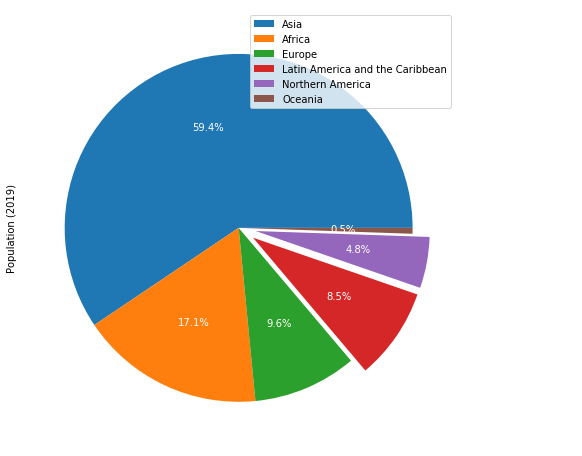

In [4]:
# Plot population by region in pie chart
explode = [0, 0, 0, 0.1, 0.1, 0]
#df_wp['Population (2019)'].plot.pie(figsize=(8,8), explode=explode, autopct='%1.1f%%', textprops={'color':"w"});
df_wp.plot.pie(y='Population (2019)', figsize=(8,8), explode=explode, autopct='%1.1f%%', textprops={'color':"w"});

In [5]:
# Calculate the percentage of the Earth's landmass that the Americas countries comprise
pct = (df_wp['Area (Km²)'].iloc[3]+df_wp['Area (Km²)'].iloc[4])/df_wp['Area (Km²)'].sum()
print (pct)

0.29817697217573663


> So it can be seen above that the Americas accounts for 13.3% of the worlds population in 2019 and 29.82% of the Earth's land area.

<a id='wrangling'></a>
## Section 2: Data Wrangling


### General Properties
> Read the Gapminder data files (one for each of the indicators to be investigated) which have previously been downloaded in .csv format. Each file contains one indicator value per year over a range of years (arranged as columns) for a range of countries (arranged as rows). The number of years for which there is data as well as the list of countries varies from one indicator to the next. 

In [6]:
# GNI (gross national income; formerly GDP) per capita (indicator of country's economic strength)
df_gni = pd.read_csv('gapminder_gnipercapita_atlasmethod_current_us.csv', index_col='country')
df_gni.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190 entries, Afghanistan to Zimbabwe
Data columns (total 56 columns):
1962    73 non-null float64
1963    74 non-null float64
1964    75 non-null float64
1965    75 non-null float64
1966    75 non-null float64
1967    82 non-null float64
1968    87 non-null float64
1969    89 non-null float64
1970    92 non-null float64
1971    93 non-null float64
1972    102 non-null float64
1973    103 non-null float64
1974    103 non-null float64
1975    102 non-null float64
1976    102 non-null float64
1977    105 non-null float64
1978    107 non-null float64
1979    112 non-null float64
1980    113 non-null float64
1981    114 non-null float64
1982    123 non-null float64
1983    126 non-null float64
1984    129 non-null float64
1985    130 non-null float64
1986    132 non-null float64
1987    132 non-null float64
1988    133 non-null float64
1989    137 non-null float64
1990    139 non-null float64
1991    138 non-null float64
1992    150 non-null floa

> The education data (average number of years in school for 25+ year olds) is contained in two separate files, one for men and another for women. In the following the two datasets are combined to form one dataframe with this indicator for both men and women.

In [7]:
df_edu_male = pd.read_csv('gapminder_edu_men_25+.csv', index_col='country')
df_edu_male.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.7,0.7,0.8,0.8,0.8,0.9,0.9,0.9,1.0,1.0,...,2.1,2.1,2.2,2.3,2.3,2.4,2.4,2.5,2.6,2.6
Albania,5.1,5.2,5.3,5.5,5.6,5.7,5.9,6.0,6.1,6.3,...,9.1,9.2,9.4,9.5,9.6,9.8,9.9,10.0,10.1,10.2
Algeria,0.9,0.9,1.0,1.1,1.1,1.2,1.2,1.3,1.4,1.4,...,3.7,3.8,3.9,4.0,4.1,4.3,4.4,4.5,4.6,4.7
Angola,1.4,1.5,1.5,1.6,1.7,1.7,1.8,1.9,2.0,2.0,...,4.0,4.1,4.3,4.4,4.5,4.6,4.7,4.9,5.0,5.1
Antigua and Barbuda,7.0,7.1,7.2,7.4,7.5,7.6,7.8,7.9,8.1,8.2,...,11.0,11.1,11.2,11.3,11.4,11.5,11.5,11.6,11.7,11.8


In [8]:
df_edu_female = pd.read_csv('gapminder_edu_women_25+.csv', index_col='country')
df_edu_female.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.4
Albania,3.9,4.0,4.1,4.2,4.3,4.5,4.6,4.7,4.8,4.9,...,8.0,8.2,8.3,8.5,8.6,8.8,8.9,9.1,9.2,9.4
Algeria,0.6,0.6,0.6,0.7,0.7,0.8,0.8,0.9,0.9,1.0,...,3.0,3.1,3.2,3.4,3.5,3.6,3.8,3.9,4.0,4.2
Angola,0.5,0.5,0.5,0.5,0.6,0.6,0.6,0.7,0.7,0.7,...,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8
Antigua and Barbuda,7.0,7.1,7.2,7.4,7.5,7.7,7.8,8.0,8.1,8.3,...,11.2,11.4,11.5,11.6,11.7,11.8,11.9,12.0,12.1,12.2


In [9]:
# Men and women years in school are combined to get a single indicator of education by averaging the two numbers.
# NOTE: This assumes that the numbers of men and women are equal which is not exactly true in all countries and age groups.
# However, for the purposes of this exercise the author proposes that it is a sufficient approximation
df_edu = df_edu_male.add(df_edu_female) 
df_edu = df_edu.div(2)
df_edu.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.35,0.40,0.45,0.45,0.45,0.50,0.50,0.50,0.55,0.55,...,1.15,1.20,1.25,1.30,1.30,1.35,1.35,1.40,1.45,1.50
Albania,4.50,4.60,4.70,4.85,4.95,5.10,5.25,5.35,5.45,5.60,...,8.55,8.70,8.85,9.00,9.10,9.30,9.40,9.55,9.65,9.80
Algeria,0.75,0.75,0.80,0.90,0.90,1.00,1.00,1.10,1.15,1.20,...,3.35,3.45,3.55,3.70,3.80,3.95,4.10,4.20,4.30,4.45
Angola,0.95,1.00,1.00,1.05,1.15,1.15,1.20,1.30,1.35,1.35,...,2.95,3.05,3.20,3.30,3.40,3.50,3.60,3.75,3.85,3.95
Antigua and Barbuda,7.00,7.10,7.20,7.40,7.50,7.65,7.80,7.95,8.10,8.25,...,11.10,11.25,11.35,11.45,11.55,11.65,11.70,11.80,11.90,12.00


In [10]:
df_life_exp = pd.read_csv('gapminder_life_expectancy.csv', index_col='country')
df_life_exp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, Afghanistan to Zimbabwe
Columns: 219 entries, 1800 to 2018
dtypes: float64(219)
memory usage: 321.4+ KB


In [11]:
df_pop = pd.read_csv('gapminder_population_total.csv', index_col='country')
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, Afghanistan to Zimbabwe
Columns: 301 entries, 1800 to 2100
dtypes: int64(301)
memory usage: 460.1+ KB


In [12]:
# Perception of corruption (2012-2017: apparently method for computing this metric changed in 2012)
df_cpi = pd.read_csv('gapminder_corruption_perception_index_cpi.csv', index_col='country')
df_cpi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177 entries, Afghanistan to Zimbabwe
Data columns (total 6 columns):
2012    172 non-null float64
2013    173 non-null float64
2014    171 non-null float64
2015    165 non-null float64
2016    173 non-null float64
2017    177 non-null int64
dtypes: float64(5), int64(1)
memory usage: 9.7+ KB


In [13]:
# Fertility rate - children per woman
df_fert = pd.read_csv('gapminder_total_fertility.csv', index_col='country')
df_fert.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184 entries, Afghanistan to Zimbabwe
Columns: 219 entries, 1800 to 2018
dtypes: float64(219)
memory usage: 316.2+ KB


### Data Cleaning 
>Since this analysis focuses on the selected indicators for the countries of the Americas the dataset has to be pared down accordingly. Furthermore the selected indicators vary considerably in the countries and the years that they appear in the dataset. These variations  need to be reconciled before exploring relationships between them. The following general steps are taking in this section to "clean" the data on a per indicator basis:
> 1. Create a dataframe for each indicator containing only data for the Americas countries 
> 2. Trim the range of years to include only those where there is meaningful subset of Americas countries represented
> 3. Remove any country from an indicator's dataframe for which there is _no_ data for that country
>
> Note that further "cleaning" will also be performed in the exploratory data analysis section to align dataframes for two indicators that are to be compared directly.

In [14]:
# This analysis focuses on the countries of the Americas so create a list of Americas countries to be included
americas = ['Antigua and Barbuda','Argentina','Bahamas','Barbados','Belize','Bolivia','Brazil','Canada','Chile','Colombia','Costa Rica','Cuba','Dominica','Dominican Republic','Ecuador','El Salvador','Grenada','Guatemala','Guyana','Haiti','Honduras','Jamaica','Mexico','Nicaragua','Panama','Paraguay','Peru','St. Lucia','St. Vincent and the Grenadines','Suriname','Trinidad and Tobago','United States','Uruguay','Venezuela']
# But 34 countries is too many on some types of charts so subdividing list into regions - North America, Central America, South America and Carribean
n_america = ['Canada','United States','Mexico']
c_america = ['Belize','Costa Rica','El Salvador','Guatemala','Honduras','Nicaragua','Panama']
s_america = ['Argentina','Bolivia','Brazil','Chile','Colombia','Ecuador','Guyana','Paraguay','Peru','Suriname','Uruguay','Venezuela']
caribbean = ['Antigua and Barbuda','Bahamas','Barbados','Cuba','Dominica','Dominican Republic','Grenada','Haiti','Jamaica','St. Lucia','St. Vincent and the Grenadines','Trinidad and Tobago']
# check the lists by print the lengths
print('Total number of Americas countries:\t', len(americas))
print('Number of countries in North America:\t', len(n_america))
print('Number of countries in Central America:\t', len(c_america))
print('Number of countries in Sorth America:\t', len(s_america))
print('Number of countries in the Caribbean:\t', len(caribbean))
print('Sum of the regional list sizes:\t\t', len(n_america)+len(c_america)+len(s_america)+len(caribbean))

Total number of Americas countries:	 34
Number of countries in North America:	 3
Number of countries in Central America:	 7
Number of countries in Sorth America:	 12
Number of countries in the Caribbean:	 12
Sum of the regional list sizes:		 34


In [15]:
# create a dataframe for population indicator
americas_pop = df_pop.loc[americas,:]
americas_pop.T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301 entries, 1800 to 2100
Data columns (total 34 columns):
Antigua and Barbuda               301 non-null int64
Argentina                         301 non-null int64
Bahamas                           301 non-null int64
Barbados                          301 non-null int64
Belize                            301 non-null int64
Bolivia                           301 non-null int64
Brazil                            301 non-null int64
Canada                            301 non-null int64
Chile                             301 non-null int64
Colombia                          301 non-null int64
Costa Rica                        301 non-null int64
Cuba                              301 non-null int64
Dominica                          301 non-null int64
Dominican Republic                301 non-null int64
Ecuador                           301 non-null int64
El Salvador                       301 non-null int64
Grenada                           301 non-null i

> Note that all 34 Americas countries have 301 years of population data. Note also that this range *extends out to the year 2100.* We will restrict our analysis to just the years 1900 to 2018 since data for year after 2018 are obviously projections and no corresponding data is available for any of the other selected indicators. The years prior to 1900 are trimmed because many of the other selected indicators to be included in this investigation don't have data prior to 1900.

In [16]:
# Trim the time range of the population dataframe
americas_pop = americas_pop.loc[:,'1900':'2018']

In [17]:
# Create a dataframe for life expectancy indicator for the Americas 
americas_life = df_life_exp.loc[americas,:]
americas_life.T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 1800 to 2018
Data columns (total 34 columns):
Antigua and Barbuda               219 non-null float64
Argentina                         219 non-null float64
Bahamas                           219 non-null float64
Barbados                          219 non-null float64
Belize                            219 non-null float64
Bolivia                           219 non-null float64
Brazil                            219 non-null float64
Canada                            219 non-null float64
Chile                             219 non-null float64
Colombia                          219 non-null float64
Costa Rica                        219 non-null float64
Cuba                              219 non-null float64
Dominica                          47 non-null float64
Dominican Republic                219 non-null float64
Ecuador                           219 non-null float64
El Salvador                       219 non-null float64
Grenada          

> Note that there is life expectancy data for all 34 Aamericas countries and that 33 of these have data from all of the years 1800 thru 2018. However, we trim the range of years to 1900 thru 2018 for similar reasons cited for doing so for the population data. Furthermore it was noticed in examination of this data for earlier years (even some years after 1900) that the data for a significant number of these countries is suspiciously constant. Thus trimming these earliest years from the dataframe is further justified.

In [18]:
# trim date range
americas_life = americas_life.loc[:,'1900':'2018']
americas_life.T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119 entries, 1900 to 2018
Data columns (total 34 columns):
Antigua and Barbuda               119 non-null float64
Argentina                         119 non-null float64
Bahamas                           119 non-null float64
Barbados                          119 non-null float64
Belize                            119 non-null float64
Bolivia                           119 non-null float64
Brazil                            119 non-null float64
Canada                            119 non-null float64
Chile                             119 non-null float64
Colombia                          119 non-null float64
Costa Rica                        119 non-null float64
Cuba                              119 non-null float64
Dominica                          47 non-null float64
Dominican Republic                119 non-null float64
Ecuador                           119 non-null float64
El Salvador                       119 non-null float64
Grenada          

In [19]:
# Create dataframe for education indicator for the Americas 
americas_edu = df_edu.reindex(americas)
americas_edu.T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 1970 to 2009
Data columns (total 34 columns):
Antigua and Barbuda               40 non-null float64
Argentina                         40 non-null float64
Bahamas                           40 non-null float64
Barbados                          0 non-null float64
Belize                            40 non-null float64
Bolivia                           40 non-null float64
Brazil                            40 non-null float64
Canada                            40 non-null float64
Chile                             40 non-null float64
Colombia                          40 non-null float64
Costa Rica                        40 non-null float64
Cuba                              40 non-null float64
Dominica                          0 non-null float64
Dominican Republic                40 non-null float64
Ecuador                           40 non-null float64
El Salvador                       40 non-null float64
Grenada                           0

> Note that the dataset does not contain _any_ average years in school data for 4 of the 34 Americas countries. Drop these countries from the dataframe. 

In [20]:
# clean eduation data by dropping the countries (4) that have no average years in school data.
americas_edu.dropna(inplace=True)
americas_edu.T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 1970 to 2009
Data columns (total 30 columns):
Antigua and Barbuda    40 non-null float64
Argentina              40 non-null float64
Bahamas                40 non-null float64
Belize                 40 non-null float64
Bolivia                40 non-null float64
Brazil                 40 non-null float64
Canada                 40 non-null float64
Chile                  40 non-null float64
Colombia               40 non-null float64
Costa Rica             40 non-null float64
Cuba                   40 non-null float64
Dominican Republic     40 non-null float64
Ecuador                40 non-null float64
El Salvador            40 non-null float64
Guatemala              40 non-null float64
Guyana                 40 non-null float64
Haiti                  40 non-null float64
Honduras               40 non-null float64
Jamaica                40 non-null float64
Mexico                 40 non-null float64
Nicaragua              40 non-null fl

In [21]:
# Create dataframe for GNI per capita indicator for the Americas  
americas_gni = df_gni.reindex(americas)
americas_gni.T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56 entries, 1962 to 2017
Data columns (total 34 columns):
Antigua and Barbuda               39 non-null float64
Argentina                         47 non-null float64
Bahamas                           56 non-null float64
Barbados                          28 non-null float64
Belize                            56 non-null float64
Bolivia                           48 non-null float64
Brazil                            34 non-null float64
Canada                            56 non-null float64
Chile                             56 non-null float64
Colombia                          56 non-null float64
Costa Rica                        56 non-null float64
Cuba                              42 non-null float64
Dominica                          39 non-null float64
Dominican Republic                56 non-null float64
Ecuador                           56 non-null float64
El Salvador                       51 non-null float64
Grenada                          

> Note that the GNI per capita dataset contains some data for each of the 34 Americas countries but the amount varies significantly over the 1962 thru 2017 range of years. This fact is seen more clearly in the following.

In [22]:
americas_gni.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, Antigua and Barbuda to Venezuela
Data columns (total 56 columns):
1962    19 non-null float64
1963    19 non-null float64
1964    19 non-null float64
1965    19 non-null float64
1966    19 non-null float64
1967    20 non-null float64
1968    21 non-null float64
1969    21 non-null float64
1970    22 non-null float64
1971    23 non-null float64
1972    24 non-null float64
1973    24 non-null float64
1974    24 non-null float64
1975    24 non-null float64
1976    24 non-null float64
1977    25 non-null float64
1978    25 non-null float64
1979    29 non-null float64
1980    29 non-null float64
1981    29 non-null float64
1982    29 non-null float64
1983    29 non-null float64
1984    30 non-null float64
1985    30 non-null float64
1986    30 non-null float64
1987    30 non-null float64
1988    30 non-null float64
1989    31 non-null float64
1990    32 non-null float64
1991    32 non-null float64
1992    32 non-null float64
1993    3

In [23]:
# Examine CPI indicator for the Americas 
americas_cpi = df_cpi.reindex(americas)
americas_cpi.info()
americas_cpi.T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, Antigua and Barbuda to Venezuela
Data columns (total 6 columns):
2012    31 non-null float64
2013    31 non-null float64
2014    31 non-null float64
2015    26 non-null float64
2016    32 non-null float64
2017    32 non-null float64
dtypes: float64(6)
memory usage: 1.9+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 2012 to 2017
Data columns (total 34 columns):
Antigua and Barbuda               0 non-null float64
Argentina                         6 non-null float64
Bahamas                           5 non-null float64
Barbados                          5 non-null float64
Belize                            0 non-null float64
Bolivia                           6 non-null float64
Brazil                            6 non-null float64
Canada                            6 non-null float64
Chile                             6 non-null float64
Colombia                          6 non-null float64
Costa Rica                        6 n

> Note that the Corruption Perception Index (CPI) indicator dataset only contains data for 2012 thru 2017 (the method of constructing this index changed in 2012) so extensive timeseries analysis of this indicator does not appear feasible. Instead the mean of the years for which this indicator exists will be used. 
>
> Note also that 2 of the Aamericas countries (Belize and Antigua and Barbuda) have no CPI data at all so these will be dropped.

In [24]:
# Since there is only 6 years worth of this indicator let's see if there is significant variation from year to year
#    for each row (i.e., country). Note that .describe applies to columns by default
df_cpi_stats = df_cpi.apply(pd.DataFrame.describe, axis=1)
df_cpi_stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177 entries, Afghanistan to Zimbabwe
Data columns (total 8 columns):
count    177 non-null float64
mean     177 non-null float64
std      176 non-null float64
min      177 non-null float64
25%      177 non-null float64
50%      177 non-null float64
75%      177 non-null float64
max      177 non-null float64
dtypes: float64(8)
memory usage: 17.4+ KB


In [25]:
# Create a dataframe with americas CPI means.
# There is no CPI data for 2 of the countries so drop these rows
americas_cpi_stats = df_cpi_stats.reindex(americas).dropna()
americas_cpi_stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Argentina to Venezuela
Data columns (total 8 columns):
count    32 non-null float64
mean     32 non-null float64
std      32 non-null float64
min      32 non-null float64
25%      32 non-null float64
50%      32 non-null float64
75%      32 non-null float64
max      32 non-null float64
dtypes: float64(8)
memory usage: 2.2+ KB


In [26]:
# Americas fertility rates
americas_fert = df_fert.reindex(americas)
americas_fert.T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 1800 to 2018
Data columns (total 34 columns):
Antigua and Barbuda               219 non-null float64
Argentina                         219 non-null float64
Bahamas                           219 non-null float64
Barbados                          219 non-null float64
Belize                            219 non-null float64
Bolivia                           219 non-null float64
Brazil                            219 non-null float64
Canada                            219 non-null float64
Chile                             219 non-null float64
Colombia                          219 non-null float64
Costa Rica                        219 non-null float64
Cuba                              219 non-null float64
Dominica                          0 non-null float64
Dominican Republic                219 non-null float64
Ecuador                           219 non-null float64
El Salvador                       219 non-null float64
Grenada           

> There is data for all but one of the 34 Americas countries in the average children per woman (i.e., fertility) dataset for 1800 thru 2018. The time range is trimmed to 1900 thru 2018 and Dominica (the country for which there is _no_ data) is dropped.

In [27]:
# Trim fertility dataframe and drop N/A
americas_fert = americas_fert.loc[:,'1900':'2018'].dropna()
americas_fert.T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119 entries, 1900 to 2018
Data columns (total 33 columns):
Antigua and Barbuda               119 non-null float64
Argentina                         119 non-null float64
Bahamas                           119 non-null float64
Barbados                          119 non-null float64
Belize                            119 non-null float64
Bolivia                           119 non-null float64
Brazil                            119 non-null float64
Canada                            119 non-null float64
Chile                             119 non-null float64
Colombia                          119 non-null float64
Costa Rica                        119 non-null float64
Cuba                              119 non-null float64
Dominican Republic                119 non-null float64
Ecuador                           119 non-null float64
El Salvador                       119 non-null float64
Grenada                           119 non-null float64
Guatemala       

> The following code creates a dataframe for analyzing the distribution of GNI per capita in the countries of the Americas in terms of population and in terms of country count. This is used later and a byproduct of this is a grouping of countries in terms of income which is also used below.

In [28]:
# create dataframe for analyzing distribution of GNI per capita in terms of country count and population
df_gni_pop = pd.concat([americas_gni['2017'], americas_pop['2017']], axis=1, sort=True).dropna()
df_gni_pop.columns=['GNI', 'POP']
df_gni_pop.head()

,GNI,POP
country,,
Antigua and Barbuda,14200.0,102000
Argentina,13000.0,44300000
Bahamas,29200.0,395000
Barbados,15500.0,286000
Belize,4390.0,375000


In [29]:
# Function that bins data of input dataframe in terms of number of countries and total population in those countries
#   given lower and upper GNI limits. 
def bin_gni(df, gni_lo=0, gni_hi=-1):
    if gni_hi != -1:
        inc_bin = df['GNI'].loc[df['GNI']<=gni_hi].index
        inc_bin_t = df['GNI'].loc[df['GNI']>gni_lo].index
        inc_bin = inc_bin.intersection(inc_bin_t)    
    else:
        inc_bin = df['GNI'].loc[df['GNI']>gni_lo].index

    bin_pop = df['POP'].loc[inc_bin].sum()
    bin_cnt = len(inc_bin)
    return bin_cnt, bin_pop, inc_bin


In [30]:
# create low income countries list and sum population 
bin_pop = np.zeros((5,2))
bin_pop[0,0], bin_pop[0,1], inc_bin0 = bin_gni(df_gni_pop, gni_hi=5000)
inc_bin0

Index(['Belize', 'Bolivia', 'El Salvador', 'Guatemala', 'Guyana', 'Haiti',
       'Honduras', 'Jamaica', 'Nicaragua', 'Paraguay'],
      dtype='object', name='country')

In [31]:
# create next higher income countries list and sum population 
bin_pop[1,0], bin_pop[1,1], inc_bin1 = bin_gni(df_gni_pop, gni_lo=5000, gni_hi=10000)
inc_bin1

Index(['Brazil', 'Colombia', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Grenada', 'Mexico', 'Peru', 'St. Lucia',
       'St. Vincent and the Grenadines', 'Suriname'],
      dtype='object', name='country')

In [32]:
# create next higher income countries list and sum population 
bin_pop[2,0], bin_pop[2,1], inc_bin2 = bin_gni(df_gni_pop, gni_lo=10000, gni_hi=20000)
inc_bin2

Index(['Antigua and Barbuda', 'Argentina', 'Barbados', 'Chile', 'Costa Rica',
       'Panama', 'Trinidad and Tobago', 'Uruguay'],
      dtype='object', name='country')

In [33]:
# create next higher income countries list and sum population 
bin_pop[3,0], bin_pop[3,1], inc_bin3 = bin_gni(df_gni_pop, gni_lo=20000, gni_hi=40000)
inc_bin3

Index(['Bahamas'], dtype='object', name='country')

In [34]:
# create highest income countries list and sum population 
bin_pop[4,0], bin_pop[4,1], inc_bin4 = bin_gni(df_gni_pop, gni_lo=40000)
inc_bin4

Index(['Canada', 'United States'], dtype='object', name='country')

<a id='eda'></a>
## Section 3: Exploratory Data Analysis


### Research Question 1: How do the countries of the Americas compare to the countries of the rest of the world and to each other in the selected indicators?

In [35]:
# Create an index for the non-Americas countries using the population dataframes (most complete list)
non_americas_idx = df_pop.index.difference(americas_pop.index)
non_americas_idx.size

161

Text(0.5, 1.0, 'Country Population Distribution (2018)')

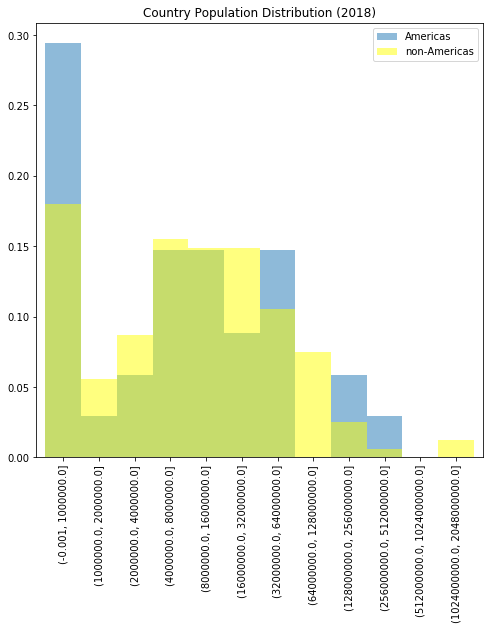

In [36]:
# Plot histograms of populations for americas countries
plt = americas_pop['2018'].value_counts(normalize=True, sort=False, bins=[0,1e6,2e6,4e6,8e6,16e6,32e6,64e6,128e6,256e6,512e6,1024e6,2048e6]).plot(kind='bar',figsize=(8,8), width=1, alpha=0.5, label='Americas');

# Plot histograms of populations for non-americas countries
non_americas_pop = df_pop.reindex(non_americas_idx)
plt = non_americas_pop['2018'].value_counts(normalize=True, sort=False, bins=[0,1e6,2e6,4e6,8e6,16e6,32e6,64e6,128e6,256e6,512e6,1024e6,2048e6]).plot(kind='bar',figsize=(8,8), width=1, alpha=0.5, color='yellow', label='non-Americas')

plt.legend(loc='upper right')
plt.set_title('Country Population Distribution (2018)')

> The country population size distribution of the Americas and non-Americas countries are plotted as a normalized, *non-uniform* bin size histogram above. The non-uniform bin sizes increase by a factor of 2 for each successive bin from left to right. This provides more resolution in the low population part of the plot and de-emphasizes relatively small differences in the high population end of the distribution. 
>
> The country population size distribution in the Americas compared to the rest of the world shows significantly more low population countries (i.e., countries with population less then 1 million). Also Americas countries population distribution is shifted towards larger sizes in the middle of the distribution. The other noteworthy feature of the above chart is the presence of very large population (greater than 1 billion), non-Americas countries (i.e., China and India).

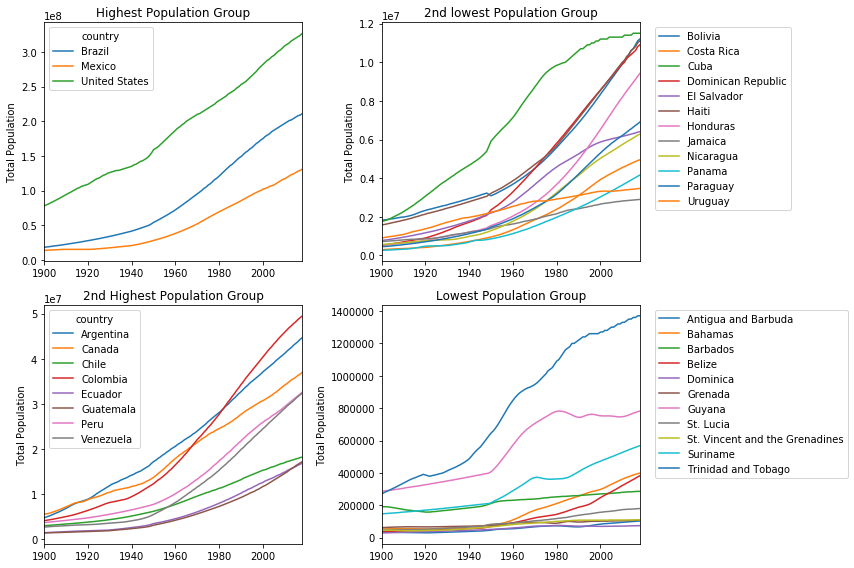

In [37]:
# Plot population data by size groupings so results are more decipherable
fig, ax = mpl.subplots(2,2,squeeze=False,figsize = (12,8))
americas_pop.loc[americas_pop['2018']>100e6, '1900':'2018'].T.plot.line(ax=ax[0,0], title='Highest Population Group')

lower_mid = americas_pop.loc[americas_pop['2018']<=100e6].index
temp_mid = americas_pop.loc[americas_pop['2018']>16e6].index
lower_mid = lower_mid.intersection(temp_mid)
americas_pop.loc[lower_mid, '1900':'2018'].T.plot.line(ax=ax[1,0], title='2nd Highest Population Group')

lower_mid = americas_pop.loc[americas_pop['2018']<=16e6].index
temp_mid = americas_pop.loc[americas_pop['2018']>2e6].index
lower_mid = lower_mid.intersection(temp_mid)
americas_pop.loc[lower_mid, '1900':'2018'].T.plot.line(ax=ax[0,1], title='2nd lowest Population Group')

americas_pop.loc[americas_pop['2018']<2e6, '1900':'2018'].T.plot.line(ax=ax[1,1], title='Lowest Population Group')
ax[1,1].set_ylabel('Total Population')
ax[1,1].legend(bbox_to_anchor=(1.04,1))
ax[0,1].set_ylabel('Total Population')
ax[0,1].legend(bbox_to_anchor=(1.04,1))
ax[1,0].set_ylabel('Total Population')
ax[0,0].set_ylabel('Total Population')
mpl.tight_layout()

> The above plots show per country total population data from 1900 thru 2018. Countries are grouped into subplots based on their populations so that trends are more decipherable. The following are some observations
>* In spite of the attempt to plot the data so that smallest countries are resolvable, there are some particularly small nations in the Americas - Dominica, Antigua and Barbuda (one country), Grenada, St. Vincent and the Grenadines (one country) and St. Lucia all have populations in 2018 of less than 200,000.
>* While population increased in all countries over the 118 year timespan of these plots, some of the small countries' populations have grown slowly for significant intervals of this time. For example, Guyana's population peaked in 1981, then dipped and has only attained that peak population again in 2018.
>* The rate of population growth in many of these countries appear to have hit an inflection point and the rate of growth has slowed. We will see more evidence of this when we examine fertility rates later.

Text(0.5, 0, 'Average GNI per Capita (US$)')

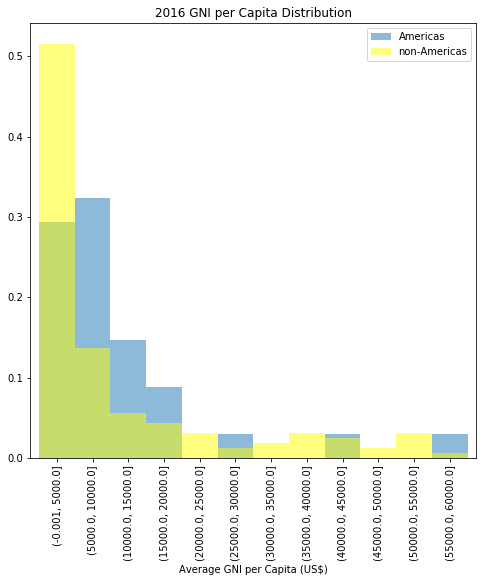

In [38]:
###### Plot histograms of GNI per capita for americas countries
bins=np.linspace(0,60000,num=13)
plt = americas_gni['2016'].value_counts(normalize=True, sort=False, bins=bins).plot(kind='bar',figsize=(8,8), width=1, alpha=0.5, label='Americas');

# Plot histograms of populations for non-americas countries
non_americas_gni = df_gni.reindex(non_americas_idx)
plt = non_americas_gni['2016'].value_counts(normalize=True, sort=False, bins=bins).plot(kind='bar',figsize=(8,8), width=1, alpha=0.5, color='yellow', label='non-Americas')

plt.legend(loc='upper right')
plt.set_title('2016 GNI per Capita Distribution')
plt.set_xlabel('Average GNI per Capita (US$)')

> The uniform bin size histogram above shows the distribution of GNI per capita for countries of the Americas along with that of the non-Americas countries. There are clearly a larger percentage of non-Americas countries in the lowest income bin but at the lower end of the income range (less then 20000 US dollars/year) there is a higher percentage of Americas countries than non-Americas countries. However, remember that this distribution is showing the percentage of *countries* in each GNI per capita bin and *not* population. Given that the Americas has a higher proportion of low population countries when compared to the rest of the world (as we saw in the prevous chart), these low income countries may not contain a equivalent percentage of population.
>
> Lets analyze the distribution of GNI per capita by population in the Americas

        Countries   Population
income                        
<5K          10.0   71723000.0
5-10K        11.0  447733900.0
10-20K        8.0   76628000.0
20-40K        1.0     395000.0
>40K          2.0  360600000.0


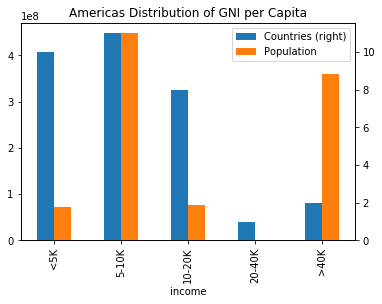

In [39]:
df_bin_pop = pd.DataFrame(bin_pop, columns=['Countries', 'Population'])
df_bin_pop.insert(0, 'income', ['<5K','5-10K','10-20K','20-40K','>40K'])
df_bin_pop.set_index('income', inplace=True)
print(df_bin_pop)
df_bin_pop.plot(kind = 'bar', secondary_y='Countries', title='Americas Distribution of GNI per Capita');

> This figure shows that while the number of low income countries in the Americas is a significant percentage in terms of count of countries (10 out of 32), the percentage of the Americas' population that live in these countries is much lower (71.7M out of 957M or 7.5%).

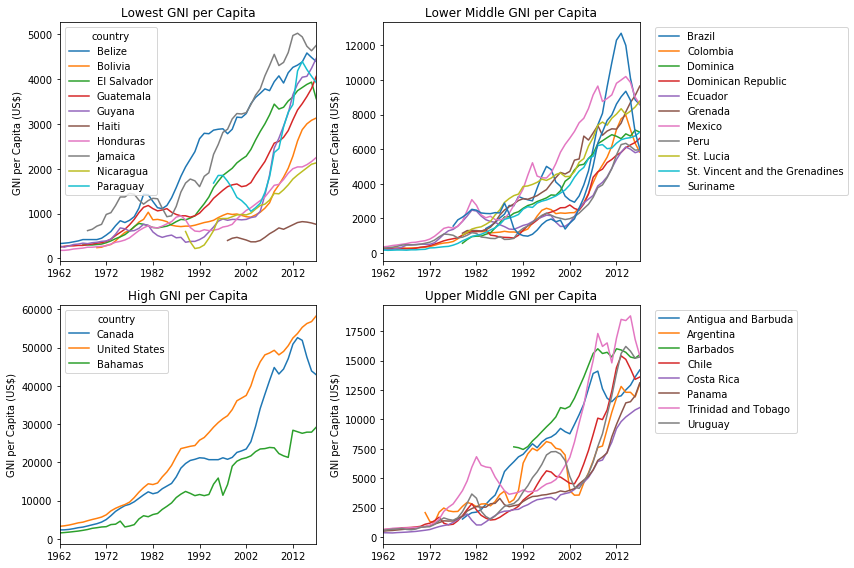

In [40]:
# Plot GNI data by "low", "lower middle", "upper middle" and high GNI per capita so results are more decipherable
fig, ax = mpl.subplots(2,2,squeeze=False,figsize = (12,8))
americas_gni.loc[inc_bin4.append(inc_bin3)].T.plot.line(ax=ax[1,0], title='High GNI per Capita')
americas_gni.loc[inc_bin2].T.plot.line(ax=ax[1,1], title='Upper Middle GNI per Capita')
americas_gni.loc[inc_bin1].T.plot.line(ax=ax[0,1], title='Lower Middle GNI per Capita')
americas_gni.loc[inc_bin0].T.plot.line(ax=ax[0,0], title='Lowest GNI per Capita')
ax[1,1].set_ylabel('GNI per Capita (US$)')
ax[1,1].legend(bbox_to_anchor=(1.04,1))
ax[0,1].set_ylabel('GNI per Capita (US$)')
ax[0,1].legend(bbox_to_anchor=(1.04,1))
ax[1,0].set_ylabel('GNI per Capita (US$)')
ax[0,0].set_ylabel('GNI per Capita (US$)')
mpl.tight_layout()

> All of the Americas countries have exhibited at least some economic growth as measured by GNI per capita; however, for the poorest country of the group, Haiti, that growth has been very slow. Economic volitility is evident in the data for several countries but this volitility is particularly noticible for Brazil, Trinidad and Tobago, Paraguay and Argentina.

Text(0.5, 0, 'Life Expectancy (Years)')

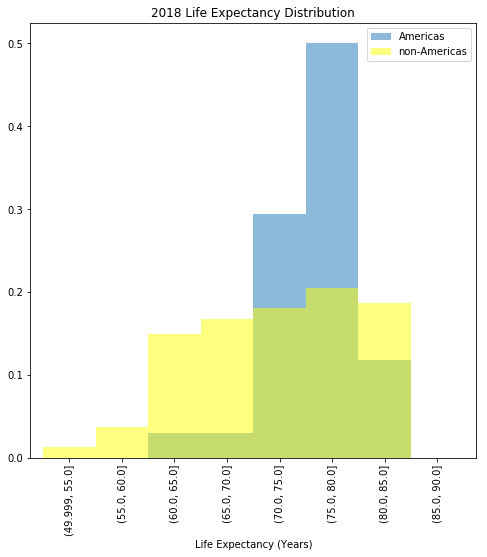

In [41]:
# Plot histograms of life expectancy for americas countries
bins=np.linspace(50,90,num=9)
plt = americas_life['2018'].value_counts(normalize=True, sort=False, bins=bins).plot(kind='bar',figsize=(8,8), width=1, alpha=0.5, label='Americas');

# Plot histograms of life expectancy for non-americas countries
non_americas_life = df_life_exp.reindex(non_americas_idx)
plt = non_americas_life['2018'].value_counts(normalize=True, sort=False, bins=bins).plot(kind='bar',figsize=(8,8), width=1, alpha=0.5, color='yellow', label='non-Americas')

plt.legend(loc='upper right')
plt.set_title('2018 Life Expectancy Distribution')
plt.set_xlabel('Life Expectancy (Years)')

> The above per country life expectancy distributions show average life expectancy for the Americas and non-Americas countries. The Americas distribution is clearly shifted to the longer life expectancy and is tighter.

Text(0, 0.5, 'Life Expectancy (Years)')

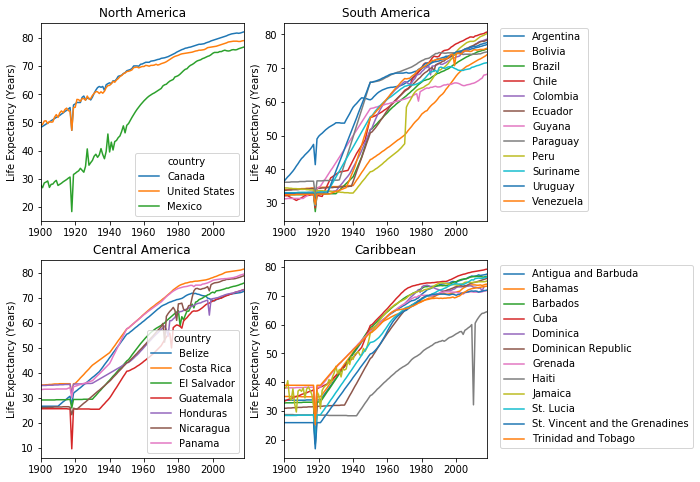

In [42]:
# Plot life expectancy data by Americas region so results are more decipherable
fig, ax = mpl.subplots(2,2,squeeze=False,figsize = (8,8))
americas_life.loc[n_america, '1900':].T.plot.line(ax=ax[0,0], title='North America')
americas_life.loc[c_america, '1900':].T.plot.line(ax=ax[1,0], title='Central America')
americas_life.loc[s_america, '1900':].T.plot.line(ax=ax[0,1], title='South America')
americas_life.loc[caribbean, '1900':].T.plot.line(ax=ax[1,1], title='Caribbean')
ax[1,1].set_ylabel('Life Expectancy (Years)')
ax[1,1].legend(bbox_to_anchor=(1.04,1))
ax[0,1].set_ylabel('Life Expectancy (Years)')
ax[0,1].legend(bbox_to_anchor=(1.04,1))
ax[1,0].set_ylabel('Life Expectancy (Years)')
ax[0,0].set_ylabel('Life Expectancy (Years)')

> The above plots life expectance for the countries in the various Americas regions.There is a significant dip in this metric across all of the countries in 1919 which corresponds to the Spanish Influenza pandemic. The severity of impact of this epidemic varied from country to country with one of the worst hit countries being Guatemala. Another very prominent dip in life expectancy occurs in 2010 for Haiti corresponding to the 2010 earthquake.
>
> The most prominent general trend exhibited in these data is the increasing life expectancy across all of these countries.

Text(0.5, 0, 'Average Number of Years in School')

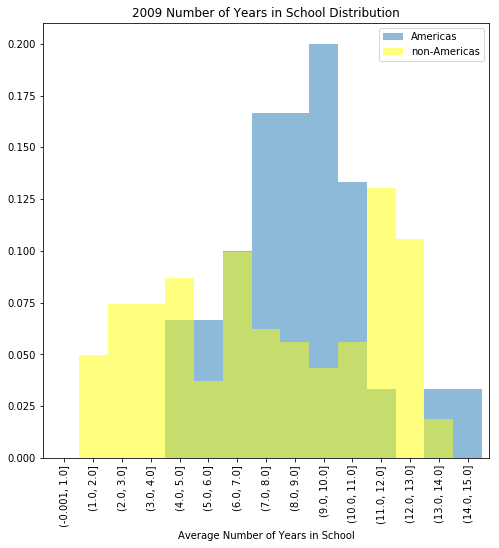

In [43]:
# Plot histograms of average years in school for americas countries
bins=np.linspace(0,15,num=16)
plt = americas_edu['2009'].value_counts(normalize=True, sort=False, bins=bins).plot(kind='bar',figsize=(8,8), width=1, alpha=0.5, label='Americas');

# Plot histograms of average years in school for non-americas countries
non_americas_edu = df_edu.reindex(non_americas_idx)
plt = non_americas_edu['2009'].value_counts(normalize=True, sort=False, bins=bins).plot(kind='bar',figsize=(8,8), width=1, alpha=0.5, color='yellow', label='non-Americas')

plt.legend(loc='upper right')
plt.set_title('2009 Number of Years in School Distribution')
plt.set_xlabel('Average Number of Years in School')

> The distributions of average years in school (2009 - the latest year where there was a reasonably complete set of indicators) for the countries of the Americas and that of the rest of the world differs most noticably in the lower tail. No country in the Americas has an average less than 4.0 years while approximately 20% of the non-Americas has an average less than that.

Text(0, 0.5, 'Number of Years in School')

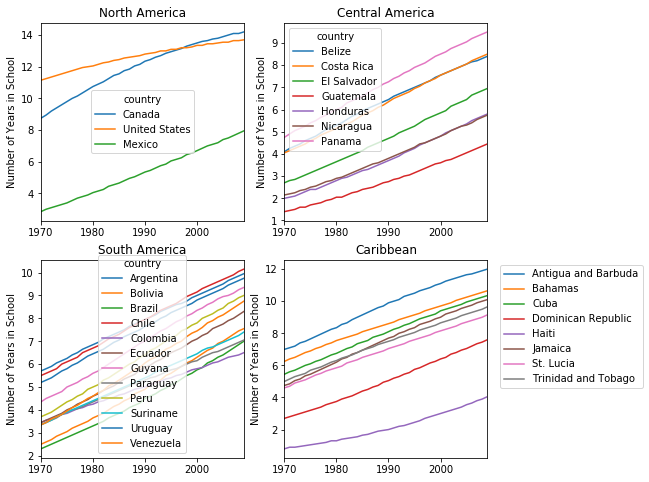

In [44]:
# Plot education data by Americas region so results are more decipherable
fig, ax = mpl.subplots(2,2,squeeze=False,figsize = (8,8))
americas_edu.reindex(n_america).T.plot.line(ax=ax[0,0], title='North America')
americas_edu.reindex(c_america).T.plot.line(ax=ax[0,1], title='Central America')
americas_edu.reindex(s_america).T.plot.line(ax=ax[1,0], title='South America')
americas_edu.reindex(caribbean).dropna().T.plot.line(ax=ax[1,1], title='Caribbean')
ax[1,1].set_ylabel('Number of Years in School')
ax[1,1].legend(bbox_to_anchor=(1.04,1))
ax[0,1].set_ylabel('Number of Years in School')
ax[1,0].set_ylabel('Number of Years in School')
ax[0,0].set_ylabel('Number of Years in School')

> Here the average number of years in school for 25+ year olds is used as an indicator of the level of education in a country. The historical data shows that the average inhabitant of all of the countries of the Americas are spending more years in school. The countries at the top of these list are Canada and the United States with more than 13 years. The countries at the bottom are Haiti and Guatemala with less then 5 years.
>
>The following lists all of the Americas countries in sorted order of this indicator in 2009. 

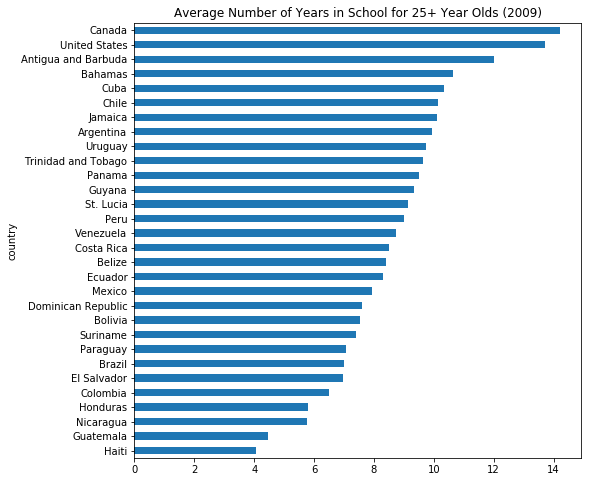

In [45]:
# print the countries with the smallest education indicator value in 2009
#americas_cpi_stats['mean'].sort_values(ascending=True).dropna()
americas_edu['2009'].sort_values(ascending=True).plot.barh(figsize=(8, 8),title='Average Number of Years in School for 25+ Year Olds (2009)');

Text(0.5, 0, 'Average Number of Children per Woman')

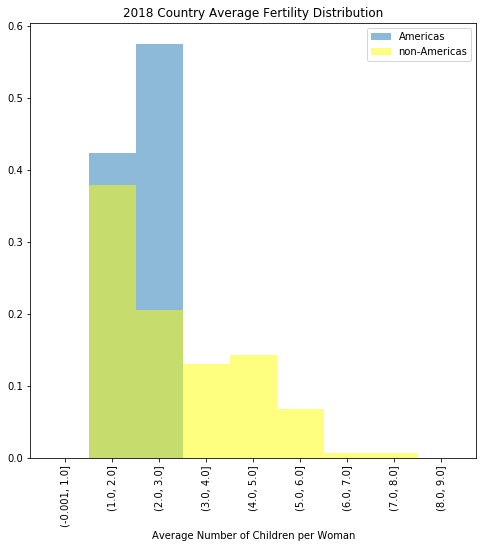

In [46]:
# Plot histograms of average number of children per woman (fertility) for americas countries
bins=np.linspace(0,9,num=10)
plt = americas_fert['2018'].value_counts(normalize=True, sort=False, bins=bins).plot(kind='bar',figsize=(8,8), width=1, alpha=0.5, label='Americas');

# Plot histograms of average number of children per woman (fertility) for non-americas countries
non_americas_fert = df_fert.reindex(non_americas_idx)
plt = non_americas_fert['2018'].value_counts(normalize=True, sort=False, bins=bins).plot(kind='bar',figsize=(8,8), width=1, alpha=0.5, color='yellow', label='non-Americas')

plt.legend(loc='upper right')
plt.set_title('2018 Country Average Fertility Distribution')
plt.set_xlabel('Average Number of Children per Woman')

> The distributions of average fertility rates in the Americas countries and non-Americas countries are surprisingly different. The Americas distribution is tightly concentrated in the 1.0 to 3.0 children per woman while that in the rest of the world is spread from 1.0 to 8.0 children per woman.

Text(0, 0.5, 'Number of Children per Woman')

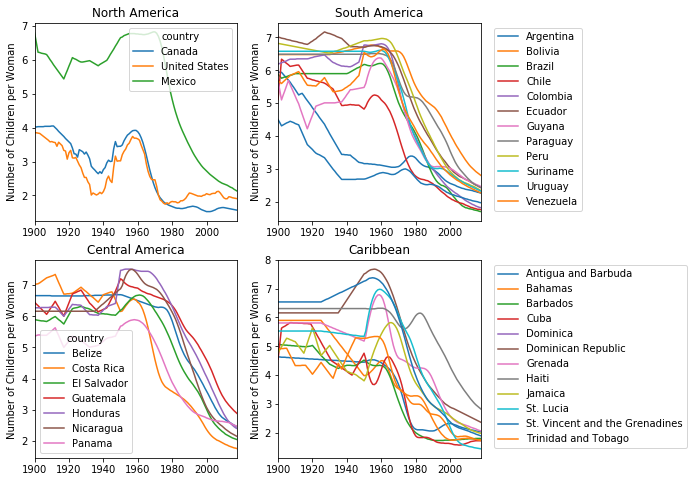

In [47]:
# Plot fertility data by Americas region so results are more decipherable
fig, ax = mpl.subplots(2,2,squeeze=False,figsize = (8,8))
americas_fert.reindex(n_america).T.plot.line(ax=ax[0,0], title='North America')
americas_fert.reindex(c_america).T.plot.line(ax=ax[1,0], title='Central America')
americas_fert.reindex(s_america).T.plot.line(ax=ax[0,1], title='South America')
americas_fert.reindex(caribbean).T.plot.line(ax=ax[1,1], title='Caribbean')
ax[1,1].set_ylabel('Number of Children per Woman')
ax[1,1].legend(bbox_to_anchor=(1.04,1))
ax[0,1].set_ylabel('Number of Children per Woman')
ax[0,1].legend(bbox_to_anchor=(1.04,1))
ax[1,0].set_ylabel('Number of Children per Woman')
ax[0,0].set_ylabel('Number of Children per Woman')

> While the fertility rates of the Americas's countries reported in this dataset vary considerably across countries during much of the 20th century the most notable feature of these plots is the decline in fertility rates seen across all countries after 1990 and all countries except Haiti and the United States starting around 1980. The fertility rate in the US fell below 2 children per woman before 1980 and ticked up a bit during the 80's.
>
> Other observation is that several of the countries' reported fertility rate look suspiciously constant from 1900 to around 1920. The following table explores this with statistics and confirms the observation.

In [48]:
suspicious = ['Antigua and Barbuda','Barbados','Belize','Dominican Republic','Grenada','Haiti','St. Lucia','St. Vincent and the Grenadines','Suriname']
am_fert_flat = americas_fert.loc[suspicious,:'1920']
am_fert_flat.T.describe()

country,Antigua and Barbuda,Barbados,Belize,Dominican Republic,Grenada,Haiti,St. Lucia,St. Vincent and the Grenadines,Suriname
count,21.000000,21.000000,21.000000,2.100000e+01,2.100000e+01,2.100000e+01,21.00,2.100000e+01,21.00
mean,4.593810,5.019524,6.654762,6.160000e+00,5.810000e+00,6.310000e+00,5.53,6.540000e+00,6.58
std,0.022908,0.024388,0.005118,1.820224e-15,1.820224e-15,9.101121e-16,0.00,2.730336e-15,0.00
min,4.560000,4.980000,6.650000,6.160000e+00,5.810000e+00,6.310000e+00,5.53,6.540000e+00,6.58
25%,4.580000,5.000000,6.650000,6.160000e+00,5.810000e+00,6.310000e+00,5.53,6.540000e+00,6.58
50%,4.590000,5.020000,6.650000,6.160000e+00,5.810000e+00,6.310000e+00,5.53,6.540000e+00,6.58
75%,4.610000,5.040000,6.660000,6.160000e+00,5.810000e+00,6.310000e+00,5.53,6.540000e+00,6.58
max,4.630000,5.060000,6.660000,6.160000e+00,5.810000e+00,6.310000e+00,5.53,6.540000e+00,6.58


Text(0.5, 1.0, 'Distribution of Country Corruption Perception Index (CPI)')

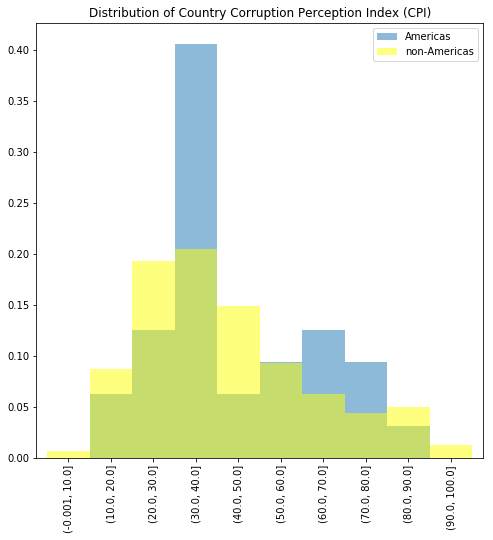

In [49]:
# Plot histograms of average corruption perception index (CPI) for americas countries
bins=np.linspace(0,100,num=11)
americas_cpi_means = americas_cpi_stats['mean']
plt = americas_cpi_means.value_counts(normalize=True, sort=False, bins=bins).plot(kind='bar',figsize=(8,8), width=1, alpha=0.5, label='Americas');

# Plot histograms of average corruption perception index (CPI) for non-americas countries
non_americas_cpi_stats = df_cpi_stats.reindex(non_americas_idx)
plt = non_americas_cpi_stats['mean'].value_counts(normalize=True, sort=False, bins=bins).plot(kind='bar',figsize=(8,8), width=1, alpha=0.5, color='yellow', label='non-Americas')

plt.legend(loc='upper right')
plt.set_title('Distribution of Country Corruption Perception Index (CPI)')

> There doesn't appear to be any significant shift between the CPI distribution of the Americas countries and the rest of the world. The small upper and lower tails are not surprising given the significantly larger number of the non-Americas country compared to the number of Americas countries.

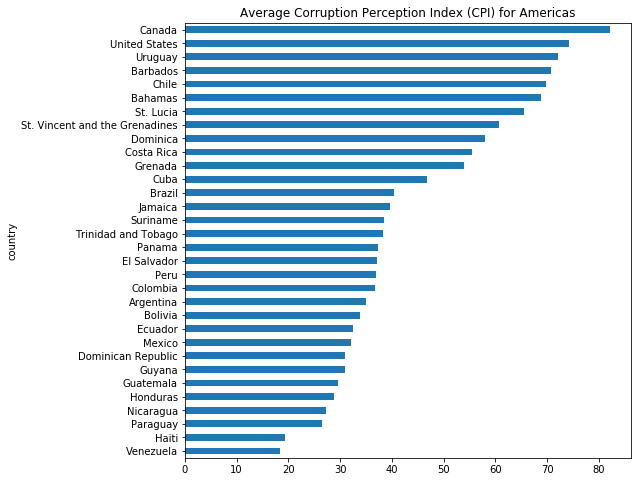

In [50]:
# Plot mean CPI for the countries of the Americas in a horizontal bar chart with courtries sorted in descending order
#americas_cpi_means = americas_cpi_stats['mean'].sort_values(ascending=True).dropna()
americas_cpi_means.sort_values(ascending=True).plot.barh(figsize=(8, 8),title='Average Corruption Perception Index (CPI) for Americas');

> The above bar chart shows the countries of the Americas in sorted order of decreasing CPI. Haiti and Venezuela occuping the bottom two positions on this list is consistent with events of recent history. We will explore the relationship between CPI and GNI per capita in in the next section.

### Research Question 2: What is the relationship between the GNI per capita indicator and each of the "independent" indicators (CPI, population and education)?
>
> Let's first examine the correlation between GNI per capita and the average number of years in school for inhabitants 25 years and older (i.e., indicator of education).

In [51]:
# create dataframe for analyzing relationship between average years in school and GNI per capita
am_edu_gni = pd.concat([americas_edu['2009'], americas_gni['2009']], axis=1, sort=True).dropna()
am_edu_gni.columns=['Years in School', 'GNI']
am_edu_gni.head()

,Years in School,GNI
Antigua and Barbuda,12.00,12600.0
Argentina,9.95,7730.0
Bahamas,10.65,22300.0
Belize,8.40,4070.0
Bolivia,7.55,1640.0


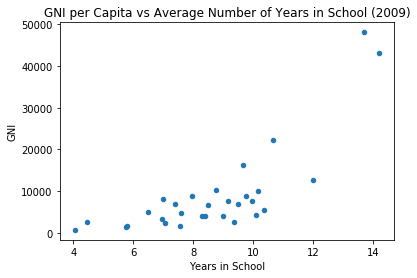

In [52]:
# visualize correlation between GNI per capita and education
am_edu_gni.plot(y='GNI', x='Years in School', kind='scatter', title='GNI per Capita vs Average Number of Years in School (2009)');

> The above scatter plot provides convincing evidence that there _is_ a correlation between the average number of years that a country's inhabitants spend in school and the GNI per capita of that country. Countries that have higher values of this education indicator generally have high GNI per capita. Note however, that this does _not_ indicate causality! The correlation could just is easily be due to richer countries choosing to afford more years in school on average as opposed to more years of school on the part of a country's inhabitants raising the country's GNI per capita.
>
> Instead of relying on visual evaluation of correlation alone, lets actually compute it. We can also compute it for each year that we have data for both of these indicators (1970-2009), thus taking advantage of more of the data.

Text(0, 0.5, 'Correlation Coefficient')

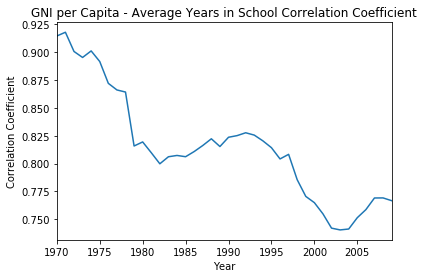

In [53]:
# Compute the correlation between columns of americas_gni and americas_edu 
#     i.e., across countries for each year 1962 thru 2017 (years that we have GNI per capita data for)
ax=americas_gni.loc[:,'1970':'2009'].corrwith(americas_edu).plot(kind='line', title='GNI per Capita - Average Years in School Correlation Coefficient')
ax.set_xlabel('Year')
ax.set_ylabel('Correlation Coefficient')

> The above plot shows good correlation between these indicators across the entire period, although the correlation is highest during the early part of the period plotted (1970-1978)
>
> Next we examine the relationship between Americas countries' GNI per capita and Corruption Perception Index (CPI)

In [54]:
# create dataframe for analyzing relationship between CPI and GNI
am_cpi_gni = pd.concat([americas_cpi_means, americas_gni['2017']], axis=1, sort=True).dropna()
am_cpi_gni.columns=['CPI', 'GNI']
am_cpi_gni.head()

,CPI,GNI
Argentina,35.000000,13000.0
Bahamas,68.800000,29200.0
Barbados,70.800000,15500.0
Bolivia,33.833333,3130.0
Brazil,40.500000,8580.0


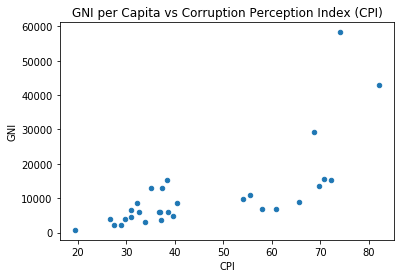

In [55]:
# visualize correlation between GNI per capita and CPI
am_cpi_gni.plot(y='GNI', x='CPI', kind='scatter', title='GNI per Capita vs Corruption Perception Index (CPI)');

> While the above scatter plot indicates some correlation between GNI per capita and CPI, the author's visual assessment of it hardly constitutes a strong relationship. We do not suspect that perception of corruption has a dominate influence on gross national income per capita based on this data. However, lets see what the computed correlation coefficient says.

In [56]:
am_cpi_gni.corr()

,CPI,GNI
CPI,1.000000,0.701756
GNI,0.701756,1.000000


> The computed correlation coefficent indicates that CPI and GNI per capita are actually pretty strongly correlated.
>
> Finally, we examine the relations between GNI per capita and total population.

In [57]:
# create dataframe for analyzing relationship between population size and GNI
am_pop_gni = pd.concat([americas_pop['2017'], americas_gni['2017']], axis=1, sort=True).dropna()
am_pop_gni.columns=['Population', 'GNI']
am_pop_gni.T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, Population to GNI
Data columns (total 32 columns):
Antigua and Barbuda               2 non-null float64
Argentina                         2 non-null float64
Bahamas                           2 non-null float64
Barbados                          2 non-null float64
Belize                            2 non-null float64
Bolivia                           2 non-null float64
Brazil                            2 non-null float64
Canada                            2 non-null float64
Chile                             2 non-null float64
Colombia                          2 non-null float64
Costa Rica                        2 non-null float64
Dominica                          2 non-null float64
Dominican Republic                2 non-null float64
Ecuador                           2 non-null float64
El Salvador                       2 non-null float64
Grenada                           2 non-null float64
Guatemala                         2 non-null 

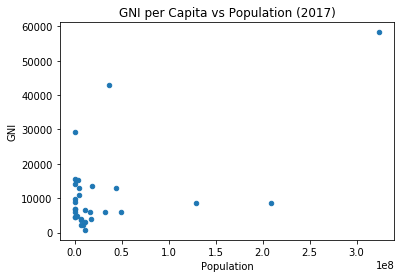

In [58]:
# visualize correlation between GNI per capita and population
am_pop_gni.plot(y='GNI', x='Population', kind='scatter', title='GNI per Capita vs Population (2017)');

> There is little discernable correlation between an Americas country's GNI per capita and its population evident in this scatter plot to this author's eye. While a large internal market could conceivably advantage higher population countries cross border trade seems to be a sufficient substitute for the Americas. Brazil and Mexico both have quite large populations but relatively small GNI per capita. On the other hand, Canada's population is on the smaller end of the Americas range but has a relatively high GNI per capita. 
>
> However, this author has miss interpreted other scatter plots so lets see what the computed correlation coefficients reveal.

Text(0, 0.5, 'Correlation Coefficient')

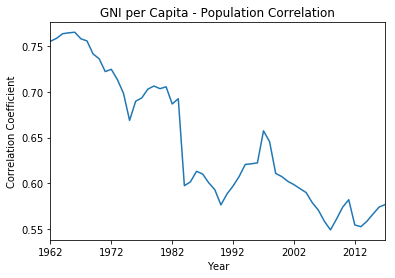

In [59]:
# Compute the correlation between columns of americas_gni and americas_pop 
#     i.e., across countries for each year 1962 thru 2017 (years that we have GNI per capita data for)
ax=americas_gni.corrwith(americas_pop.loc[:,'1962':'2017']).plot(kind='line', title='GNI per Capita - Population Correlation')
ax.set_xlabel('Year')
ax.set_ylabel('Correlation Coefficient')

> This plot shows some considerable correlation (>0.55) between GNI per capita and total population even in the more recent years. Based on this plot, this correlation was stronger in the years between 1962 and 1980.

### Research Question 3: Does the negative correlation between fertility and GNI per capita show up in these data for the Americas?

In [60]:
# create dataframe for analyzing relationship between fertility and GNI
am_fert_gni = pd.concat([americas_fert['2017'], americas_gni['2017']], axis=1, sort=True).dropna()
am_fert_gni.columns=['Fertility', 'GNI']
am_fert_gni.head()

,Fertility,GNI
Antigua and Barbuda,2.04,14200.0
Argentina,2.28,13000.0
Bahamas,1.76,29200.0
Barbados,1.80,15500.0
Belize,2.48,4390.0


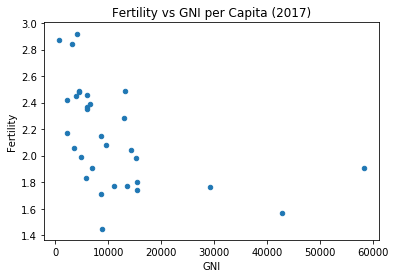

In [61]:
# visualize correlation between GNI per capita and fertility
am_fert_gni.plot(y='Fertility', x='GNI', kind='scatter', title='Fertility vs GNI per Capita (2017)');

> This scatter plot does not provide much convincing evidence that the gross national income is strongly correlated with a country's average fertility rate. But the modern range of fertility rates in the Americas is quite narrow (see the per country fertility rate plots under Research Question 1) so 2017 data is probably not the best place to look. Let's look at how these two indicators are correlated over history by calculating the correlation coefficient for each year that we have both fertility and GNI per capita data.

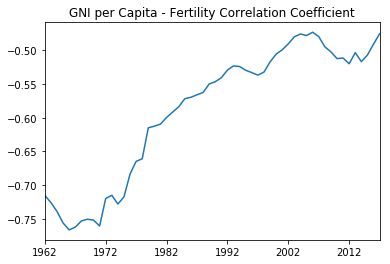

In [62]:
# Compute the correlation between columns of americas_gni and americas_fert 
#     i.e., across countries for each year 1962 thru 2017 (years that we have GNI per capita data for)
americas_gni.corrwith(americas_fert.loc[:,'1962':'2017']).plot(kind='line', title='GNI per Capita - Fertility Correlation Coefficient')

> So the above does show that in years when the data exhibits more range in fertility rates across countries the the negative correlation with GNI per capita is stronger.
>
> Another approach to computing correlation to do it per country over the range of years that we have data for both fertility rates and GNI per capita. 

In [63]:
# compute the correlation between fertility rate and GNI per capita for each country in the Americas 
#      over the timespan for which we have data for both indicators for a reasonable number of countries.
#      The GNI per capita data only spans 1962 thru 2017 and fertility rate data spans a much larger range.
am_fert_gni_corr = americas_fert.corrwith(americas_gni, axis=1)
am_fert_gni_corr

country
Antigua and Barbuda               0.155117
Argentina                        -0.827268
Bahamas                          -0.930498
Barbados                          0.925641
Belize                           -0.987826
Bolivia                          -0.817918
Brazil                           -0.781970
Canada                           -0.555250
Chile                            -0.700668
Colombia                         -0.734194
Costa Rica                       -0.785124
Cuba                             -0.535847
Dominican Republic               -0.751243
Ecuador                          -0.783428
El Salvador                      -0.928132
Grenada                          -0.930358
Guatemala                        -0.953316
Guyana                           -0.560801
Haiti                            -0.893948
Honduras                         -0.921142
Jamaica                          -0.823415
Mexico                           -0.873961
Nicaragua                        -0.915951
Pan

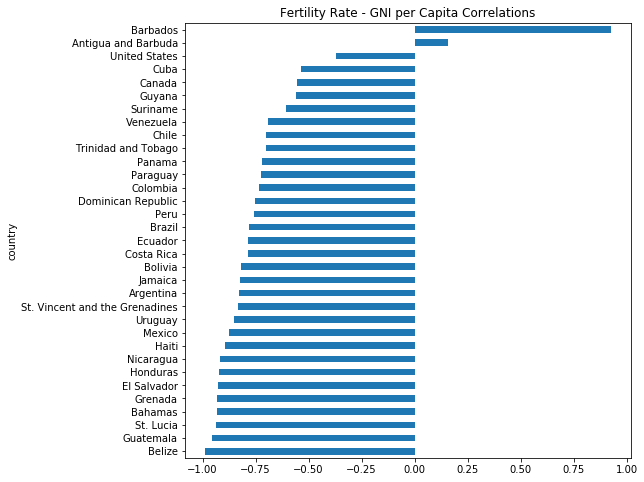

In [64]:
# plot correlations
am_fert_gni_corr.dropna().sort_values(ascending=True).plot.barh(figsize=(8, 8),title='Fertility Rate - GNI per Capita Correlations');

> The above bar chart reveals a negative correlation coefficient between the fertility rate timeseries and GNI per capita timeseries for all of the Americas countries except two - Barbados and Antigua and Barbuda (one country). The correlation coefficient for Barbados is a quite large _positive_ number (0.925641)! However, this outlier can be explained away by the fact that there is only 28 years of GNI stats in the dataset for Barbados (1991-2018) and by the start of this period the fertility rate in Barbados had already fallen to less then 2 births per woman and actualy climbed slightly (from 1.73 to 1.8) from 1991 to 2018. The GNI per capita also rose during this years, thus the strongly positive correlation. The small but positive correlation coefficient between these timeseries for Antigua and Barbuda is due to a substantally flat fertility rate and a volatile GNI per capita. The correlation coefficient is small - basically noise.
>
> The correlation coefficient between fertility rate timeseries and the GNI per capita timeseries for the remaining countries are all negative. Countries where fertility rates fell before 1962 and then stablized like the United States show a smaller negative correlation with GNI per capita. Also countries that show more volatility in their GNI per capita growth have a smaller magnitude, negative correlation coefficient with fertility rate. In summary, this data _does_ show a negative correlation between the GNI per capita timeseries and the fertility rate timeseries over the period of 1962 thru 2017.

### Research Question 4: Are life expectancy and GNI per capita correlated in any significant fashion?

In [65]:
# create dataframe for analyzing relationship between life expectancy and GNI per capita
am_life_gni = pd.concat([americas_life['2017'], americas_gni['2017']], axis=1, sort=True).dropna()
am_life_gni.columns=['Life Expectancy', 'GNI']
am_life_gni.T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, Life Expectancy to GNI
Data columns (total 31 columns):
Antigua and Barbuda               2 non-null float64
Argentina                         2 non-null float64
Bahamas                           2 non-null float64
Barbados                          2 non-null float64
Belize                            2 non-null float64
Bolivia                           2 non-null float64
Brazil                            2 non-null float64
Canada                            2 non-null float64
Chile                             2 non-null float64
Colombia                          2 non-null float64
Costa Rica                        2 non-null float64
Dominican Republic                2 non-null float64
Ecuador                           2 non-null float64
El Salvador                       2 non-null float64
Grenada                           2 non-null float64
Guatemala                         2 non-null float64
Guyana                            2 non-

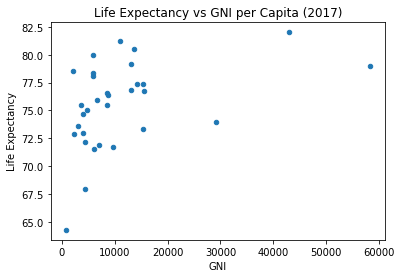

In [66]:
# visualize correlation between GNI per capita and life expectancy
am_life_gni.plot(y='Life Expectancy', x='GNI', kind='scatter', title='Life Expectancy vs GNI per Capita (2017)');

> Visually the above scatter plot does not convey a very strong correlation between life expectancy and GNI per capita. This could be due to the relatively small subset of countries that we are working with. By 2017 the life expectancies in all but two of Americas countries had risen to more than 70 years so the range of life expectancies is relatively narrow. To quantify this let's look at the statistics.

In [67]:
# statistics for life expectancy for Americas countries in 2017
americas_life['2017'].describe()

count    33.000000
mean     75.639394
std       3.776154
min      64.300000
25%      73.300000
50%      75.900000
75%      78.400000
max      82.000000
Name: 2017, dtype: float64

> We can see that the standard deviation of life expectancy across the Americas countries was only 3.78 years in 2017. Maybe data from an earlier time before life expectancies has converged to the same extent would exhibit more of a correlation. 

In [68]:
# statistics for life expectancy for Americas countries in 1962
americas_life['1962'].describe()

count    33.00000
mean     60.10303
std       7.36043
min      42.00000
25%      58.70000
50%      61.90000
75%      64.30000
max      71.40000
Name: 1962, dtype: float64

In [69]:
americas_gni['1962'].notnull().value_counts()

True     19
False    15
Name: 1962, dtype: int64

> Life expectancies varied more in 1962 but the GNI data only exists for 19 Americas countries for that year. Try a later year.

In [70]:
# statistics for life expectancy for Americas countries in 1962
americas_life['1972'].describe()

count    34.000000
mean     64.544118
std       6.244376
min      46.400000
25%      62.575000
50%      65.750000
75%      68.500000
max      73.000000
Name: 1972, dtype: float64

In [71]:
americas_gni['1972'].notnull().value_counts()

True     24
False    10
Name: 1972, dtype: int64

In [72]:
# create dataframe for analyzing relationship between life expectancy and GNI per capita
am_life_gni_1972 = pd.concat([americas_life['1972'], americas_gni['1972']], axis=1, sort=True).dropna()
am_life_gni_1972.columns=['Life Expectancy', 'GNI']
am_life_gni_1972.T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, Life Expectancy to GNI
Data columns (total 24 columns):
Argentina                         2 non-null float64
Bahamas                           2 non-null float64
Belize                            2 non-null float64
Bolivia                           2 non-null float64
Canada                            2 non-null float64
Chile                             2 non-null float64
Colombia                          2 non-null float64
Costa Rica                        2 non-null float64
Cuba                              2 non-null float64
Dominican Republic                2 non-null float64
Ecuador                           2 non-null float64
El Salvador                       2 non-null float64
Guatemala                         2 non-null float64
Guyana                            2 non-null float64
Honduras                          2 non-null float64
Jamaica                           2 non-null float64
Mexico                            2 non-

Text(0.5, 1.0, 'Life Expectancy vs GNI per Capita (1972)')

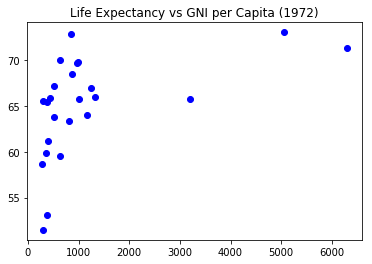

In [73]:
# visualize correlation between GNI per capita and life expectancy
#ax = am_life_gni_1972.plot(y='Life Expectancy', x='GNI', kind='scatter', sharex=True, color='b')
#ax = am_life_gni.plot(y='Life Expectancy', x='GNI', kind='scatter', sharex=True, color='r')
x1 = americas_gni['1972']
y1 = americas_life['1972']
mpl.scatter(x1,y1,color='b')
mpl.title('Life Expectancy vs GNI per Capita (1972)')

> The Life Expectancy vs GNI per Capita scatter plot for 1972 does not look very different from the one for 2017. Lets calculate the correlation coefficients instead.

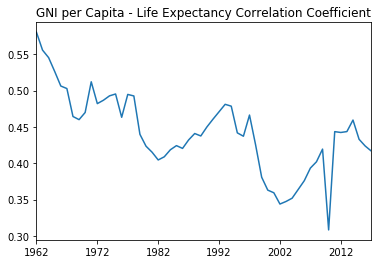

In [74]:
# Compute the correlation between columns of americas_gni and americas_life 
#     i.e., across countries for each year 1962 thru 2017 (years that we have GNI per capita data for)
americas_gni.corrwith(americas_life.loc[:,'1962':'2017']).plot(kind='line', title='GNI per Capita - Life Expectancy Correlation Coefficient')

> This plot shows that the correlation between life expectancy and GNI per capita varies from year to year but, while never seen to be particularly strong, was generally stronger in the earlier years of the period represented in the data.
>
> Calculating this correlation on a per country basis over the span of years that both indicators are available provides a different perspective. 

In [75]:
# compute the correlation between life expectancy and GNI per capita for each country in the Americas 
#      over the timespan for which we have data for both indicators for a reasonable number of countries.
#      The GNI per capita data only spans 1962 thru 2017 and life expectancy data spans a much larger range.
am_life_gni_corr = americas_life.corrwith(americas_gni, axis=1)
am_life_gni_corr

country
Antigua and Barbuda               0.972548
Argentina                         0.814443
Bahamas                           0.926915
Barbados                          0.981530
Belize                            0.717475
Bolivia                           0.773861
Brazil                            0.844243
Canada                            0.944102
Chile                             0.770980
Colombia                          0.879721
Costa Rica                        0.789094
Cuba                              0.909363
Dominica                          0.175884
Dominican Republic                0.797906
Ecuador                           0.826051
El Salvador                       0.914330
Grenada                           0.761970
Guatemala                         0.848013
Guyana                            0.665539
Haiti                             0.303441
Honduras                          0.830541
Jamaica                           0.760349
Mexico                            0.891519
Nic

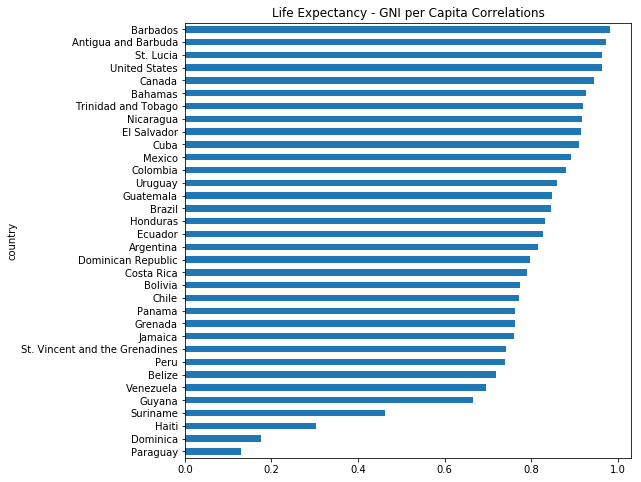

In [76]:
# plot correlations
am_life_gni_corr.dropna().sort_values(ascending=True).plot.barh(figsize=(8, 8),title='Life Expectancy - GNI per Capita Correlations');

> This perspective shows a strong correlation between life expectancy and GNI per capita for all but thet poorest countries of the Americas. However, note that even for these lowest GNI per capita countries life expectancy has increased (see plots of life expectancy under Research Question 1).

<a id='conclusions'></a>
## Section 4: Conclusions

> In this investigation we have examined selected indicators for the countries of the Americas and explored some relationships between them. The Americas countries were studied because of there historic similarities and geographic separation from the rest of the world's countries. In spite of these similarities significant differeences can be found in the selected indicators for these countries - both in terms of the latest values as well as the targetories seen over time. 
>
>While both rich and poor, large and small countries are found in the Americas, we found in Research Question 1 that the countries of this region appear to be distinct from the rest of the world as measured by some of the selected indicators. While we cannot claim that these differences are statistically significant given that no statistical tests were performed, some of these differences are included in the following conclusions:
>* We find visually significant differences in the distributions of countries' life expectancy, number of years in school (education) and average number of children per woman (fertility) when compared to those for the countries of the rest of the world.
>* While the examination of these indicators show considerable variation across the countries of the Americas, there were some trends seen across them all. 1) Life expectancies are increasing and the range observed across countries has narrowed over time. 2) Average numbers of years in school in the various countries have all increased. 3) Fertility rates in these countries have all fallen over the past 30 years.
>
>In Research Question 2 we examine the relationships between GNI per capita (an indication of a countries economic performance) and education, perceived corruption and a countries total population. The following are the conclusions drawn from this part of the investigation:
>* There appears to be a strong correlation between the countries GNI per capita and average number of years in school of its inhabitants. However the strength of this correlation as measured by the correlation coefficient appears to be decreasing over time.
>* GNI per capita also appears to be correlated with CPI which might evidence that perception of corruption (and lack of confidence in a countries institutions) reduces the countries economic performance.
>* GNI per capita was also shown to be correlated to some degree with a country's total population size.
>
> In Research Question 3 we examine the relationship between GNI per capita and fertility rate to see if the widely observed negative correlation between these two indicators holds up in the countries of the Americas. We find that this negative correlation is observed in the data but that the strength of the relationship has declined over the past 50 years as the fertility rates have, in general, stablized.
>
> In the last Research Question 4 we ask if there is a significant correlation between the life expectancy in an Americas country and the GNI per capita. We found that these indicators have a consistently positive correlation over the period that the data covers but that it was not a particularly strong relationship.
>
> One final observation: Two ways of computing correlations were explored in this investigation: 1) The correlation between two indicators was computed across countries using data from a specific year and 2) the correlation was computed for a specific country using data across the years. While the sign of the correlation computed using these two approaches were generally the same the magnitude or strength of the correlation was different. The author concludes that the better approach for exploring the relationship between two indicators *as a general principle* is method 1. This approach reveals the correlation as it exists fundamentally across multiple realizations (in multiple countries) which includes country specific influences.